<a href="https://colab.research.google.com/github/micheal13195/DATA-SCIENCE/blob/main/DSN_ML_BOOTCAMP_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import lightgbm as lgb

In [ ]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

ModuleNotFoundError: ignored

In [ ]:
pwd

'/content'

In [ ]:
ls

Housing_dataset_test.csv   sample_data/
Housing_dataset_train.csv  Sample_submission.csv


In [ ]:
ls

Housing_dataset_test.csv   sample_data/
Housing_dataset_train.csv  Sample_submission.csv


In [ ]:
testdata=pd.read_csv('Housing_dataset_test.csv')

In [ ]:
traindata=pd.read_csv('Housing_dataset_train.csv')

In [ ]:
submission = pd.read_csv("Sample_submission.csv")

In [ ]:
submission.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [ ]:
testdata

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [ ]:
traindata

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [ ]:
testdata.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
traindata.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [ ]:
testdata

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [ ]:
x_axis1=traindata['bedroom']
y_axis1=traindata['price']

<Axes: xlabel='bedroom', ylabel='price'>

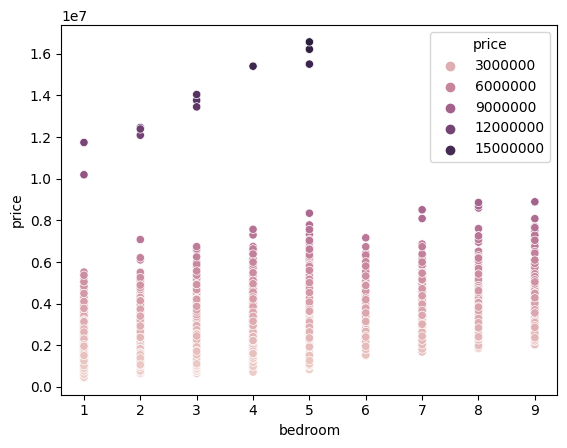

In [ ]:
sns.scatterplot(x=x_axis1, y=y_axis1, hue=traindata['price'])

<Axes: xlabel='parking_space', ylabel='price'>

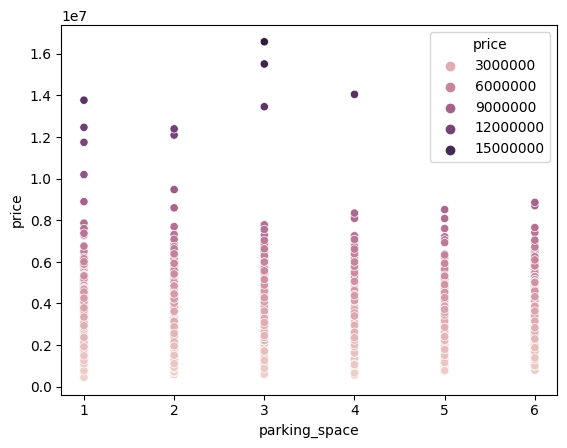

In [ ]:
x_axis2=traindata['parking_space']
y_axis2=traindata['price']
sns.scatterplot(x=x_axis2, y=y_axis2, hue=traindata['price'])

<Axes: xlabel='bathroom', ylabel='price'>

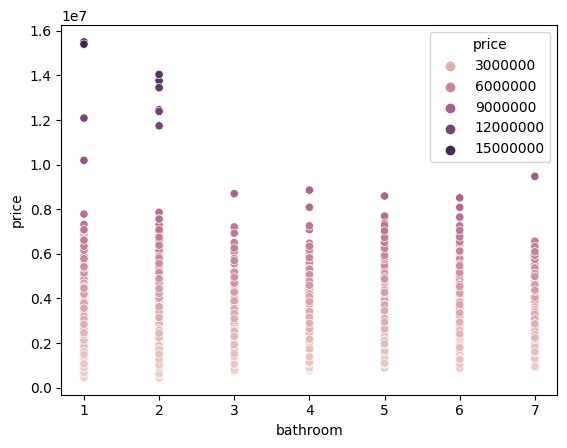

In [ ]:
x_axis3=traindata['bathroom']
y_axis3=traindata['price']
sns.scatterplot(x=x_axis3, y=y_axis3, hue=traindata['price'])

In [ ]:
traindata.describe().columns

Index(['ID', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [ ]:
traindata.title.unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [ ]:
title.count()

NameError: ignored

Text(0.5, 1.0, 'Bivariate Analysis')

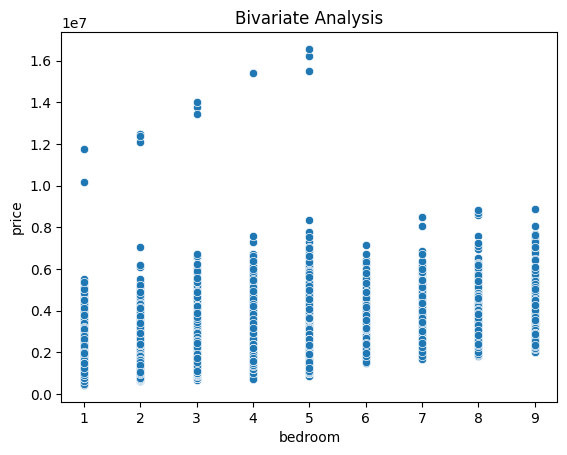

In [ ]:
sns.scatterplot(x=traindata['bedroom'], y=traindata['price'])
plt.title('Bivariate Analysis')

In [ ]:
traindata[['bedroom','price']].corr()

,bedroom,price
bedroom,1.000000,0.529145
price,0.529145,1.000000


In [ ]:
traindata[['parking_space','price']].corr()

,parking_space,price
parking_space,1.000000,0.109211
price,0.109211,1.000000


In [ ]:
traindata[['title','price']].corr()

,price
price,1.0


In [ ]:
traindata[['ID','price']].corr()

,ID,price
ID,1.000000,0.167093
price,0.167093,1.000000


In [ ]:
traindata[['loc','price']].corr()

,price
price,1.0


<Axes: >

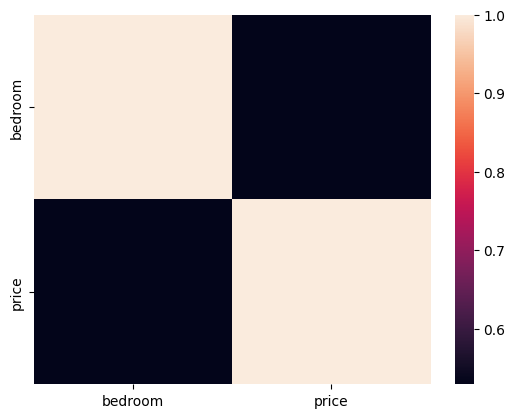

In [ ]:
sns.heatmap(traindata[['bedroom','price']].corr())
# The brither the color the higher the correlation
#Therefore correlation btw bedroom and price is low

<Axes: >

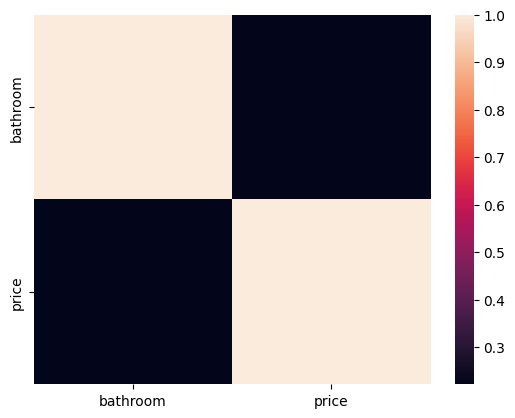

In [ ]:
sns.heatmap(traindata[['bathroom','price']].corr())
# The brither the color the higher the correlation
#Therefore correlation btw bedroom and price is low

<Axes: >

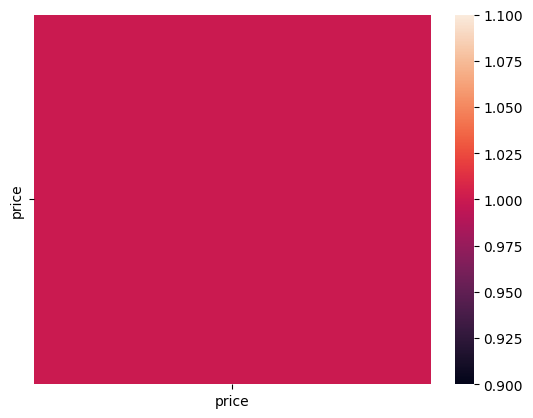

In [ ]:
sns.heatmap(traindata[['title','price']].corr())
# The brither the color the higher the correlation
#Therefore correlation btw title and price is high

In [ ]:
traindata.title.unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [ ]:
ranking = traindata.drop("price", axis=1).append(testdata)

In [ ]:
house_type_ranking = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Semi-detached duplex':5,
    'Detached duplex':6,
    'Flat':7,
    'Penthouse':8,
    'Apartment':9,
    'Mansion':10,
}
ranking['title'] = ranking['title'].map(house_type_ranking)

In [ ]:
ranking.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,5.0,2.0,2.0,1.0
1,2748,Ondo,9.0,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,6.0,5.0,2.0,4.0
4,10300,Kogi,4.0,NaN,5.0,6.0


In [ ]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies = ranking['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
ranking['loc'] = ranking['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
ranking.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,0.028592,5.0,2.0,2.0,1.0
1,2748,0.028097,9.0,NaN,2.0,4.0
2,9261,0.027822,NaN,7.0,5.0,NaN
3,2224,0.029856,6.0,5.0,2.0,4.0
4,10300,0.027382,4.0,NaN,5.0,6.0


In [ ]:
traindata.shape

(14000, 7)

In [ ]:
X = ranking[:traindata.shape[0]]
y = traindata.price
testdata_df = ranking[traindata.shape[0]:]

In [ ]:
X

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,0.028592,5.0,2.0,2.0,1.0
1,2748,0.028097,9.0,NaN,2.0,4.0
2,9261,0.027822,NaN,7.0,5.0,NaN
3,2224,0.029856,6.0,5.0,2.0,4.0
4,10300,0.027382,4.0,NaN,5.0,6.0
...,...,...,...,...,...,...
13995,6175,0.025678,2.0,NaN,7.0,NaN
13996,9704,0.029472,9.0,NaN,7.0,5.0
13997,11190,0.027327,2.0,8.0,6.0,5.0
13998,9256,0.027162,7.0,NaN,6.0,1.0


In [ ]:
y

0        1149999.565
1        1672416.689
2        3364799.814
3        2410306.756
4        2600700.898
            ...     
13995    2367927.861
13996    2228516.471
13997    2406812.693
13998    3348918.718
13999    2858516.890
Name: price, Length: 14000, dtype: float64

In [ ]:
X.shape, y.shape, testdata_df.shape

((14000, 6), (14000,), (6000, 6))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
lgb_preds = lgb.predict(X_test)

print(f'mse = {mean_squared_error(y_test, lgb_preds, squared=False)}')

mse = 592967.7830463304


In [ ]:
predictions = lgb.predict(testdata_df)
predictions

array([2271778.65061387,  842392.6432408 , 1127577.30375913, ...,
       1968144.28549131, 1407601.3137131 , 3281053.07400238])

In [ ]:
submission['price'] = predictions
submission.head()

,ID,price
0,845,2.271779e+06
1,1924,8.423926e+05
2,10718,1.127577e+06
3,12076,7.450446e+06
4,12254,2.037654e+06


In [ ]:
fold_pred=[]
oof_pred = []

params = {
    'n_estimators': 500,
    'colsample_bytree': 0.86,
 'learning_rate': 0.032,
 'max_depth': 7,
 'subsample': 0.85}


fold = KFold(n_splits=7, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)#erly100

    preds= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    oof_pred.append(mean_squared_error(y_test,np.expm1(preds),squared=False))
    p2 = model.predict(testdata_df[X.columns])
    fold_pred.append(np.expm1(p2))


print(np.mean(oof_pred))

err:  533445.1535624941
err:  529942.5567107679
err:  514828.8512048958
err:  614399.716811027
err:  483153.89868846233
err:  508860.02904162544
err:  671196.6806105172
550832.4123756842


Text(0.5, 1.0, 'CatboostClassifier features importance (top 50):')

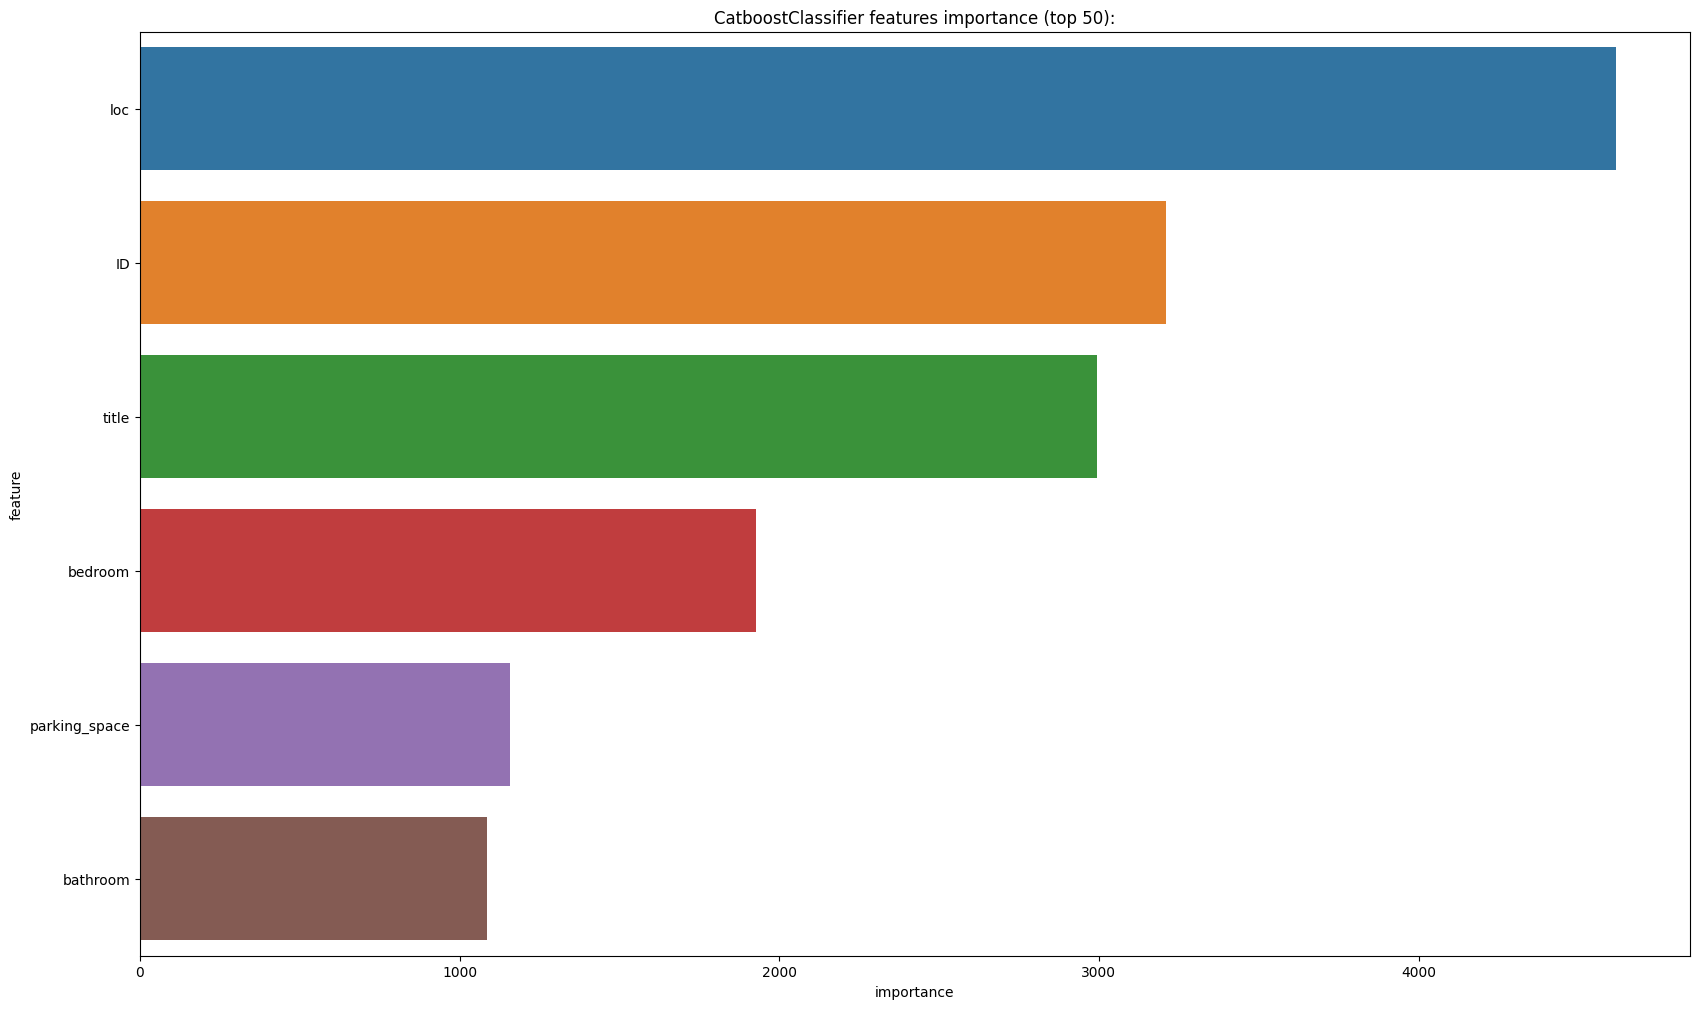

In [ ]:
# # 0.7831404345536787
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostClassifier features importance (top 50):')

In [ ]:
submission.head()

,ID,price
0,845,2.271779e+06
1,1924,8.423926e+05
2,10718,1.127577e+06
3,12076,7.450446e+06
4,12254,2.037654e+06


In [ ]:
submission['price'] =  np.mean(fold_pred, axis = 0)

In [ ]:
submission.to_csv('House price prediction submission.csv', index=False)

In [3]:
git clone

SyntaxError: ignored